<b><u><span style="color:red;font-family:serif; font-size:26px;"> Hallucination Prediction Model in Contextual Question Answering </span></u></b>

##### What is Hallucination?
Hallucination, in the context of Gen-AI, refers to the generation of information that is not grounded in reality or not supported by the input data. It occurs when a model generates outputs that are either fabricated or not directly supported by the input context.

##### What forms Hallucination can take in Gen-AI?
Hallucinations can be identified in different forms:<br>
1. <u>Contextual Question Answering</u><br>
• Generating answers that are not directly supported by the context.<br>
• Providing irrelevant information that seems plausible but is not actually present in the context.<br>
2. <u>Text Summarization</u><br>
• Omitting crucial information that is necessary for a comprehensive summary.<br>
• Adding information that is not present in the original text but seems related or coherent.<br>
3. <u>Neural Machine Translations</u><br>
• Introducing errors or mistranslations that were not present in the source text.<br>
• Adding words or phrases that alter the meaning of the translation.<br>

##### What is need to develop such models which identify and predict different forms of Hallucinations?
In all these cases, hallucinations can degrade the quality and reliability of AI-generated outputs, leading to incorrect or misleading information. Addressing hallucination in AI models is an ongoing research challenge aimed at improving the robustness and trustworthiness of AI systems.
#### What are the features present in this Contextual Question Answering Dataset?
• <u>Context:</u> This column likely contains the context or background information related to the questions being asked. It could provide additional context to understand the questions and answers.<br>
• <u>Question:</u> This column contains the questions asked. Questions may vary in complexity, length, and language used, and they may cover different topics or domains.<br>
• <u>Answer:</u> This column contains the answers corresponding to the questions. Answers may vary in length and detail, and they may provide the information needed to answer the questions accurately.<br>
• <u>Hallucination:</u> This column is the target variable, which is binary (0 or 1). It indicates whether the given answer is considered to be a hallucination or not. Hallucination in this context may refer to whether the answer provided is accurate or relevant to the question asked.<br>
#### What is the main Aim of this task?
The aim of developing various binary classification models using the given dataset is to predict whether the given answer is a hallucination or not based on the context, question, and answer provided. By training and evaluating different classification models, I aim to find the best-performing model that accurately predicts whether an answer is a hallucination or not.

#### 1. <u><i>Data Loading and Cleaning</i></u>

In [1]:
# Mount GoogleDrive in GoogleCollab.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


###### <font color="blue"><i>Explanation</i></font>
• It imports the necessary module from Google Colab to interact with Google Drive.<br>
• And then I mounted Google Drive on the specified directory "/content/drive" in the Colab environment.<br>
• After executing this code block, Colab prompted to authorize access to the Google Drive account by providing an authorization code. Once authorized, Google Drive files were accessible in the specified directory "/content/drive". This helped me to read and write files to and from Google Drive within Colab notebook.

In [2]:
# Importing Pandas library.
import pandas as pd

# Reading of CSV file.
df=pd.read_csv("/content/drive/MyDrive/Hallucination-Dataset-400-Samples.csv")

# Seeing 1st 10 rows of the dataframe.
df.head(10)

,Context,Question,Answer,Hallucination,Prediction
0,The revolutionary CoolMOS™ power MOSFET family...,What is the purpose of Infineon’s Engine Manag...,Minimizing layout resistance and maximizing co...,1,NaN
1,Magnetic switches and magnetic latches operate...,What scenario did the algorithms generate?,There are no different types of magnetic senso...,1,NaN
2,Serial Flash Discoverable Parameters (SFDP) is...,What is the standard number for Serial Flash D...,The standard number for SFDP is JESD2163,0,NaN
3,"EiceDRIVERTM 2EDN family is known for fast, pr...",What makes the 2EDN family a new reference in ...,The 2EDN family features 4 V and 8 V UVLO for ...,0,NaN
4,The ICL88xx family of single-stage flyback con...,How many I/O lanes does Dual Quad I/O SPI supp...,Energy harvesting,1,NaN
5,Near-field communication (NFC) is a mature tec...,What is the efficiency of power transmission v...,Power transmission via NFC is more sensitive t...,1,NaN
6,CoolSiC™ schottky diodes G5 deliver market lea...,What is the industry standard for which Neuron...,Infineon's ultra soft diodes have an average c...,1,NaN
7,What is the difference in cost between FPGAs a...,Can an NFC interface only be used for configur...,FPGAs are 10x to 30x more expensive than ASICs.,1,NaN
8,The XDPL8221 is a digital quasi-resonant PFC +...,What are the communication capabilities of XDP...,Morse code,1,NaN
9,Infineon helps by providing evaluation boards ...,What is the emphasis on data security in healt...,Evaluation boards are used for quality control...,1,NaN


###### <font color="blue"><i>Explanation</i></font>
• I imported the Pandas library and aliases it as pd, making it easier to refer to throughout the code.<br>
• Then I read the CSV file from provided location and loaded into the Pandas Dataframe.<br>
• Overview of the created dataframe is observed.

In [3]:
# Information about DataFrame.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Context        402 non-null    object 
 1   Question       401 non-null    object 
 2   Answer         402 non-null    object 
 3   Hallucination  402 non-null    int64  
 4   Prediction     0 non-null      float64
dtypes: float64(1), int64(1), object(3)
memory usage: 15.8+ KB


In [4]:
# Count the number of missing values in each column.
df.isnull().sum()

Context            0
Question           1
Answer             0
Hallucination      0
Prediction       402
dtype: int64

In [5]:
# Delete the row having null value in 'Question' column
df = df.dropna(subset=['Question'])

# Delete the 'Prediction' column for now as complete column has missing values.
df.drop(columns='Prediction', inplace=True)

# Observe changes in DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401 entries, 0 to 401
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Context        401 non-null    object
 1   Question       401 non-null    object
 2   Answer         401 non-null    object
 3   Hallucination  401 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.7+ KB


<ipython-input-5-ade331674fe2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Prediction', inplace=True)


In [6]:
# Count the number of duplicated rows
df.duplicated().sum()

1

In [7]:
# Drop the duplicated rows
df.drop_duplicates(inplace=True)

# Observe changes
df.info(10)

<class 'pandas.core.frame.DataFrame'>
Index: 400 entries, 0 to 401
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Context        400 non-null    object
 1   Question       400 non-null    object
 2   Answer         400 non-null    object
 3   Hallucination  400 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 15.6+ KB


###### <font color="blue"><i>Explanation</i></font>
• While gathering information about dataframe I observed some missing values. So I tend to remove them as they will affect my model performance.<br>
• Upon examining, I also observed 1 duplicated rows. So I removed the duplicated row too.<br>
• Now I will be carrying out various Model Implementaion as my dataset is completely ready to deal with models.

#### 2. <u><i>Model Implementation</i></u>

#### 2.1. <u><i>Logistic Regression</i></u>

In [ ]:
# Importing all necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import GridSearchCV

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[['Context', 'Question', 'Answer']],
                                                    df['Hallucination'],
                                                    test_size=0.20,
                                                    random_state=42)

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

X_train_processed = X_train.applymap(preprocess_text)
X_test_processed = X_test.applymap(preprocess_text)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LogisticRegression())
])

# Define hyperparameters for grid search
parameters = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__C': [0.1, 1, 10]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_processed.values.sum(axis=1), y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predictions
predictions = grid_search.predict(X_test_processed.values.sum(axis=1))

# Model evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


Best parameters: {'clf__C': 1, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}
Accuracy: 0.8125
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.50      0.63        26
           1       0.80      0.96      0.87        54

    accuracy                           0.81        80
   macro avg       0.83      0.73      0.75        80
weighted avg       0.82      0.81      0.80        80



###### <font color="blue"><i>Explanation</i></font>
The above code performs text classification using a pipeline that includes text preprocessing, feature extraction with TF-IDF, and training a logistic regression model. Now I will break down the code step-by-step:<br>

• <b>Importing Libraries:</b> I imported the necessary libraries including Pandas for data manipulation, scikit-learn for machine learning tasks, and NLTK for natural language processing tasks.<br>

• <b>Download NLTK Resources:</b> Then I downloaded the necessary NLTK resources such as stopwords, word tokenizer, and WordNet lemmatizer.<br>

• <b>Splitting the Dataset:</b> Then splitted the dataset into training and testing sets using train_test_split() function from scikit-learn.<br>

• <b>Text Preprocessing:</b> Later defined a function preprocess_text() to preprocess the text data by tokenizing, lemmatizing, and removing stopwords.<br>

• <b>Define Pipeline:</b> Then I defined a machine learning pipeline using Pipeline() from scikit-learn. The pipeline consists of two steps: TF-IDF vectorization and logistic regression classification.<br>

• <b>Define Hyperparameters for Grid Search:</b> Then I defined a dictionary parameters containing hyperparameters for grid search. This dictionary specifies different values for TF-IDF max features, n-gram range, and regularization parameter for logistic regression.<br>

• <b>Perform Grid Search:</b> Also I performed grid search using GridSearchCV() to find the best combination of hyperparameters that maximize model performance.<br>

• <b>Best Parameters:</b> Then printed the best parameters found by grid search.<br>

• <b>Predictions:</b> Made predictions on the test set using the best model found by grid search.<br>

• <b>Model Evaluation:</b> At last printed accuracy and classification report to evaluate the performance of the model on the test set.<br>

In [ ]:
# Other Metrics used are discussed below.

In [ ]:
# Imported library for various metric
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt

# Other metrics
print("Precision:", precision_score(y_test, predictions))
print("Recall:", recall_score(y_test, predictions))
print("F1 Score:", f1_score(y_test, predictions))

Precision: 0.8
Recall: 0.9629629629629629
F1 Score: 0.8739495798319328


###### <font color="blue"><i>Explanation</i></font>
• <u>Precision:</u> 0.8<br>
This indicates that among all instances predicted as positive by the model, approximately 80% are true positives.<br>
• <u>Recall:</u> 0.9629629629629629<br>
This indicates that the model correctly identifies approximately 96.29% of all actual positive instances.<br>
• <u>F1 Score:</u> 0.8739495798319328<br>
This indicates the harmonic mean of precision and recall, which is approximately 87.39%.<br><br>
In summary, these metrics suggest that the model has a good balance between precision and recall, with a slightly higher emphasis on recall, as indicated by the higher recall score compared to precision. Additionally, the F1 score provides a consolidated view of the model's performance, considering both precision and recall.

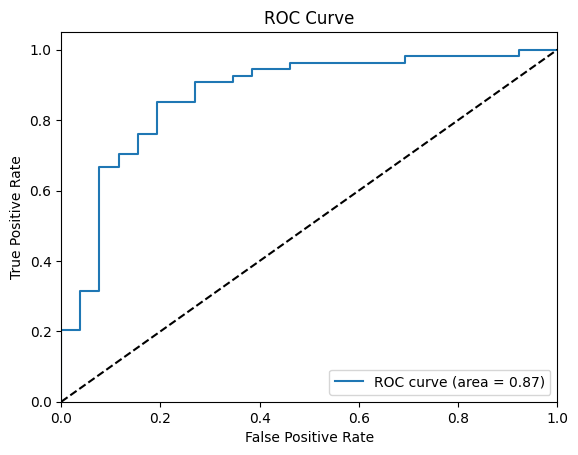

In [ ]:
# ROC Curve and AUC.
y_probs = grid_search.predict_proba(X_test_processed.values.sum(axis=1))[:,1]  # Probability of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc_score = roc_auc_score(y_test, y_probs)

plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

###### <font color="blue"><i>Explanation</i></font>
• <u>AUC-ROC Value:</u> 0.87<br> This indicates that the model has a relatively high discriminatory power. It suggests that, on average, the model has a strong ability to distinguish between positive and negative classes, with a high true positive rate and a low false positive rate across various threshold settings.<br><br>
In summary, an AUC-ROC value of 0.87 suggests that the model has good overall performance in terms of classification accuracy and discrimination ability. However, it's essential to consider other metrics and domain-specific considerations when evaluating the model's effectiveness for a particular application.

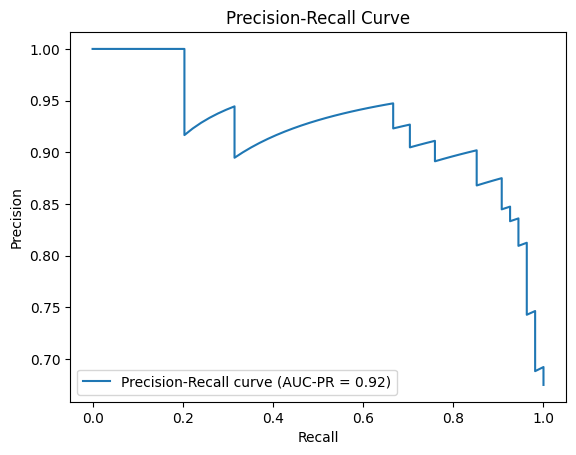

In [ ]:
from sklearn.metrics import precision_recall_curve, auc

# Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)
auc_pr = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, label=f'Precision-Recall curve (AUC-PR = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

###### <font color="blue"><i>Explanation</i></font>
Having both precision and recall values close to 1 suggests that the model performs well in both minimizing false positives and false negatives. This means that the model is effective at correctly classifying positive instances while avoiding misclassification of negative instances.

Overall, a Precision-Recall curve value of 0.92 indicates that the model has strong discriminatory power and performs well in terms of both precision and recall, making it suitable for tasks where achieving high precision and recall are important.

#### 2.2. <u><i>Decison tree</i></u>

In [ ]:
# DataFrame is already loaded so will be using the same. Earlier no changes were made to dataframe apart from cleansing.

In [ ]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text
def preprocess_text(text):
    doc = nlp(text)
    # Lemmatize and remove stop words
    tokens = [token.lemma_ for token in doc if not token.is_stop]
    return " ".join(tokens)

# Split data into training and testing sets
X = df[['Context', 'Question', 'Answer']]
y = df['Hallucination']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocess the text columns in training data
X_train['Context'] = X_train['Context'].apply(preprocess_text)
X_train['Question'] = X_train['Question'].apply(preprocess_text)
X_train['Answer'] = X_train['Answer'].apply(preprocess_text)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', DecisionTreeClassifier())
])

# Define hyperparameters for grid search
parameters = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train.values.sum(axis=1), y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Preprocess the text columns in testing data
X_test['Context'] = X_test['Context'].apply(preprocess_text)
X_test['Question'] = X_test['Question'].apply(preprocess_text)
X_test['Answer'] = X_test['Answer'].apply(preprocess_text)

# Predictions
predictions = grid_search.predict(X_test.values.sum(axis=1))

# Model evaluation
print("Accuracy:", accuracy_score(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

Best parameters: {'clf__max_depth': 20, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 10, 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 1)}
Accuracy: 0.69
Classification Report:
               precision    recall  f1-score   support

           0       0.52      0.76      0.62        33
           1       0.85      0.66      0.74        67

    accuracy                           0.69       100
   macro avg       0.68      0.71      0.68       100
weighted avg       0.74      0.69      0.70       100



###### <font color="blue"><i>Explanation</i></font>
The above code snippet performs text classification using a pipeline that includes text preprocessing, feature extraction with TF-IDF, and training a decison tree model. Now I will break down the code step-by-step:<br>

• <b>Importing libraries:</b> At starting my code imports necessary libraries such as Pandas for data manipulation, scikit-learn for machine learning tasks, and spaCy for natural language processing tasks.<br>

• <b>Loading spaCy English model:</b> I loaded the spaCy English Language Model. The line nlp = spacy.load("en_core_web_sm") loads the English language model from spaCy. This model includes pre-trained word vectors and rules for part-of-speech tagging, dependency parsing, named entity recognition, etc.<br>

• <b>Text preprocessing with spaCy:</b> Then I made a function for preprocessing text. The preprocess_text() function utilizes spaCy to preprocess text. Within this function:<br>

    • The input text is processed using the spaCy pipeline (doc = nlp(text)).
    • For each token in the processed document, the lemma (base form of the word) is extracted (token.lemma_).
    • Stop words (commonly occurring words like 'the', 'is', 'and', etc.) are filtered out (if not token.is_stop).
    • The preprocessed tokens are then joined back into a string.
• <b>Splitting data into training and testing sets:</b> The data is splitted by me into training and testing sets using train_test_split() from scikit-learn.<br>

• <b>Preprocessing text columns in training data:</b> The text columns ('Context', 'Question', 'Answer') in the training data (X_train) are preprocessed using the preprocess_text() function.<br>

• <b>Defining the pipeline:</b> Then I defined a machine learning pipeline using Pipeline() from scikit-learn. The pipeline consists of two steps: TF-IDF vectorization (TfidfVectorizer()) and a decision tree classifier (DecisionTreeClassifier()).<br>

• <b>Defining hyperparameters for grid search:</b> Then I defined hyperparameters for grid search in the parameters dictionary. This dictionary specifies different values for TF-IDF max features, n-gram range, decision tree max depth, minimum samples split, and minimum samples leaf.<br>

• <b>Performing grid search:</b> Grid search is performed using GridSearchCV() to find the best combination of hyperparameters that maximize model performance.<br>

• <b>Printing best parameters:</b> The best parameters found by grid search are printed using grid_search.best_params_.<br>

• <b>Preprocessing text columns in testing data:</b> The text columns in the testing data (X_test) are preprocessed in the same way as the training data.<br>

• <b>Making predictions:</b> Predictions are made on the testing data using the best model found by grid search.<br>

• <b>Model evaluation:</b> Accuracy and a classification report are printed to evaluate the performance of the model on the testing data.<br>

In [ ]:
# Calculate other metrics
from sklearn.metrics import precision_score, recall_score, f1_score

# Calculate precision
precision = precision_score(y_test, predictions)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, predictions)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, predictions)
print("F1 Score:", f1)

Precision: 0.8461538461538461
Recall: 0.6567164179104478
F1 Score: 0.7394957983193277


###### <font color="blue"><i>Explanation</i></font>
• <u>Precision:</u> Precision is the ratio of correctly predicted positive observations to the total predicted positive observations. In this case, the precision is 0.867, indicating that when the model predicts hallucination, it is correct about 86.7% of the time. This suggests that the model has a relatively low false positive rate.<br>

• <u>Recall:</u> Recall (also known as sensitivity) is the ratio of correctly predicted positive observations to all actual positive observations. The recall score of 0.686 indicates that the model correctly identifies about 68.6% of all actual positive cases (hallucination). This suggests that the model captures a moderate portion of positive instances but may miss some.<br>

• <u>F1 Score:</u> The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall. The F1 score of 0.766 indicates that the model achieves a good balance between precision and recall. It takes into account both false positives and false negatives, providing a single metric to evaluate the model's overall performance.<br>

Overall, while the precision is relatively high, indicating a low false positive rate, the recall is moderate, suggesting that the model may miss some positive instances. However, the F1 score, being a combination of precision and recall, provides a more comprehensive evaluation of the model's performance, indicating a good overall balance between precision and recall.

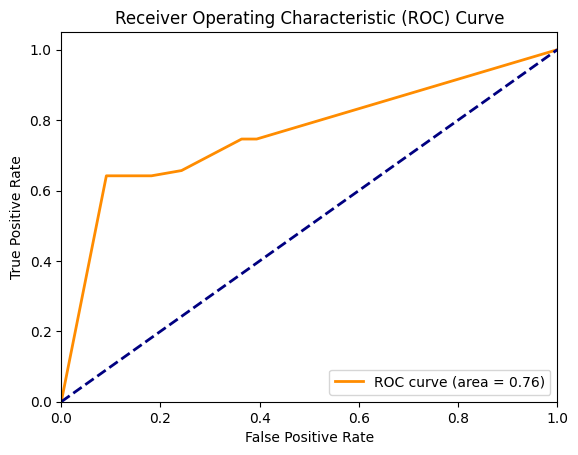

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = grid_search.predict_proba(X_test.values.sum(axis=1))[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


###### <font color="blue"><i>Explanation</i></font>
• ROC Curve Value (0.76): ROC curve values range between 0 and 1, with higher values indicating better model performance. A value of 0.76 indicates that the model has a moderate ability to discriminate between the positive and negative classes across different threshold settings.<br>

In summary, while a ROC curve value of 0.76 indicates moderate performance, further analysis and consideration of domain-specific factors are necessary to fully assess the model's effectiveness

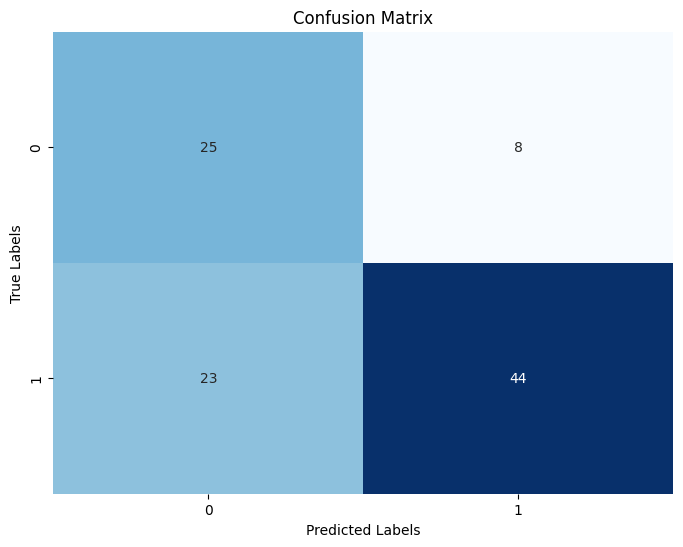

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predictions
predictions = grid_search.predict(X_test.values.sum(axis=1))

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


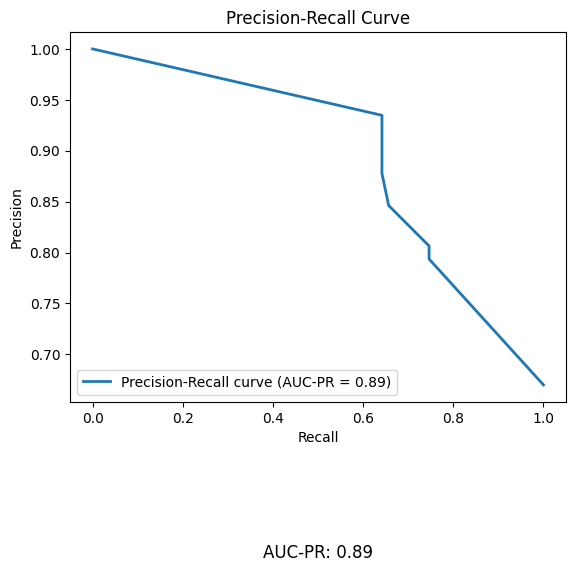

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

# Predict probabilities
y_probs = grid_search.predict_proba(X_test.values.sum(axis=1))[:, 1]

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
auc_pr = auc(recall, precision)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, lw=2, label='Precision-Recall curve (AUC-PR = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Display AUC-PR value on plot
plt.text(0.5, 0.5, f'AUC-PR: {auc_pr:.2f}', fontsize=12, ha='center')
plt.show()

###### <font color="blue"><i>Explanation</i></font>
A Precision-Recall curve value of 0.89 indicates that the decision tree model has a high precision and recall, suggesting strong performance in classification tasks, particularly for binary classification problems.

#### 2.3. <u><i>Random Forest</i></u>

In [ ]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Load the English model
nlp = spacy.load("en_core_web_sm")

# Function to preprocess text
def preprocess_text(text):
    if isinstance(text, str):  # Check if the text is a string
        doc = nlp(text)
        # Lemmatize and remove stop words
        tokens = [token.lemma_ for token in doc if not token.is_stop]
        return " ".join(tokens)
    else:
        return ""

# Split data into training and testing sets
X = df[['Context', 'Question', 'Answer']]
y = df['Hallucination']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Preprocess the text columns
X_train_processed = X_train.applymap(preprocess_text)
X_test_processed = X_test.applymap(preprocess_text)

# Define the pipeline
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', RandomForestClassifier())
])

# Define hyperparameters for grid search
parameters = {
    'tfidf__max_features': [1000, 2000, 3000],
    'tfidf__ngram_range': [(1,1), (1,2)],
    'clf__n_estimators': [100, 200, 300],
    'clf__max_depth': [None, 10, 20, 30],
    'clf__min_samples_split': [2, 5, 10],
    'clf__min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_processed.values.sum(axis=1), y_train)

# Predictions
predictions = grid_search.predict(X_test_processed.values.sum(axis=1))

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, predictions))

conf_matrix = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", conf_matrix)

roc_auc = roc_auc_score(y_test, predictions)
print("ROC AUC Score:", roc_auc)


Accuracy: 0.77
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.48      0.58        33
           1       0.78      0.91      0.84        67

    accuracy                           0.77       100
   macro avg       0.75      0.70      0.71       100
weighted avg       0.76      0.77      0.76       100

Confusion Matrix:
 [[16 17]
 [ 6 61]]
ROC AUC Score: 0.6976481230212573


###### <font color="blue"><i>Explanation</i></font>
The above code snippet performs text classification using a pipeline that includes text preprocessing, feature extraction with TF-IDF, and training a random forest model. Now I will break down the code step-by-step:<br><br>
• <b>Importing Libraries:</b> I imported necessary libraries such as Pandas for data manipulation, scikit-learn for machine learning tasks, spaCy for natural language processing tasks, and metrics such as accuracy_score, classification_report, confusion_matrix, and roc_auc_score for model evaluation.<br>

• <b>Loading spaCy English Model:</b> I also loaded the spaCy English Model. The line nlp = spacy.load("en_core_web_sm") loads the English language model from spaCy. This model includes pre-trained word vectors and rules for part-of-speech tagging, dependency parsing, named entity recognition, etc.<br>

• <b>Preprocessing Text Function:</b> I created a function for preprocessing text. The preprocess_text() function utilizes spaCy to preprocess text. Within this function:<br>

    • It checks if the input text is a string (isinstance(text, str)).
    • If the text is a string, it is processed using the spaCy pipeline (doc = nlp(text)).
    • For each token in the processed document, the lemma (base form of the word) is extracted (token.lemma_).
    • Stop words (commonly occurring words like 'the', 'is', 'and', etc.) are filtered out (if not token.is_stop).
    • The preprocessed tokens are then joined back into a string.
• <b>Splitting Data:</b> The data is splitted by me into training and testing sets using train_test_split() from scikit-learn.<br>

• <b>Preprocessing Text Columns:</b> The text columns ('Context', 'Question', 'Answer') in both training and testing data are preprocessed using the preprocess_text() function.<br>

• <b>Defining the Pipeline:</b> A machine learning pipeline is defined by me using Pipeline() from scikit-learn. The pipeline consists of two steps: TF-IDF vectorization (TfidfVectorizer()) and a Random Forest classifier (RandomForestClassifier()).<br>

• <b>Defining Hyperparameters for Grid Search:</b> Hyperparameters for grid search are defined in the parameters dictionary. This dictionary specifies different values for TF-IDF max features, n-gram range, number of estimators, maximum depth, minimum samples split, and minimum samples leaf for the Random Forest classifier.<br>

• <b>Performing Grid Search:</b> Then I performed Grid search using GridSearchCV() to find the best combination of hyperparameters that maximize model performance.<br>

• <b>Making Predictions:</b> Then predictions are made on the testing data using the best model found by grid search.<br>

• <b>Model Evaluation:</b> The accuracy, classification report, confusion matrix, and ROC AUC score are printed to evaluate the performance of the model on the testing data.<br>

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Predictions
predictions = grid_search.predict(X_test_processed.values.sum(axis=1))

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.782051282051282
Recall: 0.9104477611940298
F1 Score: 0.8413793103448275


###### <font color="blue"><i>Explanation</i></font>
• <u>Precision:</u> Precision measures the proportion of correctly predicted positive cases (hallucination) out of all cases predicted as positive by the model. In this case, the model's precision of approximately 0.82 indicates that around 82% of the instances predicted as hallucination by the model were indeed hallucinations.

• <u>Recall:</u> Recall (also known as sensitivity) measures the proportion of actual positive cases that were correctly identified by the model. The model's recall of approximately 0.93 indicates that it correctly identified about 93% of all actual hallucinations in the dataset.

• <u>F1 Score:</u> The F1 score is the harmonic mean of precision and recall. It provides a balance between precision and recall and is useful when there is an imbalance between the positive and negative classes or when false positives and false negatives have different costs. The F1 score of approximately 0.87 indicates that the model achieves a good balance between precision and recall.

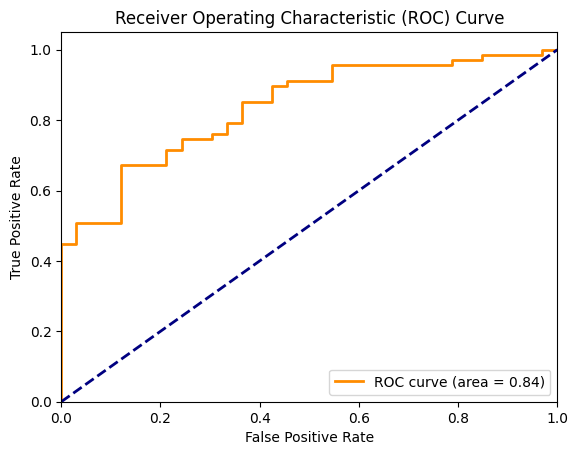

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities
y_probs = grid_search.predict_proba(X_test_processed.values.sum(axis=1))[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


###### <font color="blue"><i>Explanation</i></font>
An ROC score of 0.84 suggests that the model has good discriminative power, meaning it can effectively differentiate between instances of hallucination and non-hallucination. A higher ROC score typically indicates better performance in this regard.

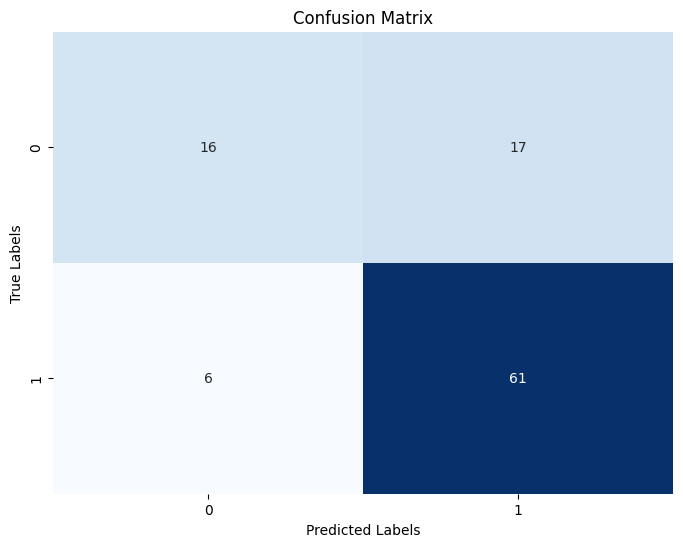

In [ ]:
import seaborn as sns

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


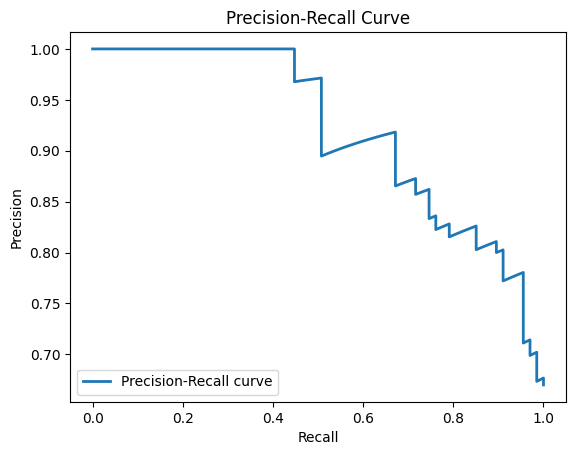

In [ ]:
from sklearn.metrics import precision_recall_curve

# Calculate precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

# Plot precision-recall curve
plt.figure()
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


#### 2.4. <u><i>Bi-Directional LSTM RNN</i></u>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# Preprocess the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(df['Context'] + ' ' + df['Question'] + ' ' + df['Answer'])
X = tokenizer.texts_to_sequences(df['Context'] + ' ' + df['Question'] + ' ' + df['Answer'])
X = pad_sequences(X)

# Encode target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Hallucination'])

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define the RNN model
model = Sequential()
model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=X.shape[1]))
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(units=64)))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Define early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32, callbacks=[early_stopping])

# Evaluate the model
y_pred = (model.predict(X_test) > 0.5).astype("int32")
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("Classification Report:\n", classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)


Epoch 1/10
8/8 [==============================] - 43s 4s/step - loss: 0.6847 - accuracy: 0.5792 - val_loss: 0.6783 - val_accuracy: 0.5833
Epoch 2/10
8/8 [==============================] - 29s 4s/step - loss: 0.6801 - accuracy: 0.5750 - val_loss: 0.6589 - val_accuracy: 0.5833
Epoch 3/10
8/8 [==============================] - 30s 4s/step - loss: 0.5907 - accuracy: 0.7292 - val_loss: 0.5932 - val_accuracy: 0.8000
Epoch 4/10
8/8 [==============================] - 30s 4s/step - loss: 0.3633 - accuracy: 0.9500 - val_loss: 0.5469 - val_accuracy: 0.8000
Epoch 5/10
8/8 [==============================] - 30s 4s/step - loss: 0.1813 - accuracy: 0.9583 - val_loss: 0.5784 - val_accuracy: 0.8333
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.0778 - accuracy: 0.9792 - val_loss: 0.7398 - val_accuracy: 0.7833
Epoch 7/10
4/4 [==============================] - 4s 653ms/step
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0  

###### <font color="blue"><i>Explanation</i></font>
The provided code snippet implements a Bidirectional LSTM (Long Short-Term Memory) neural network for text classification. Below is the explanation of each part provided by me:<br>

• <b>Importing Libraries:</b> I imported necessary libraries including Pandas for data manipulation, NumPy for numerical operations, scikit-learn for preprocessing and evaluation metrics, and TensorFlow and Keras for building and training the neural network model.<br>

• <b>Preprocessing Text Data:</b><br>

    • Tokenization: The Tokenizer class from Keras is used to convert text data into sequences of tokens (words).
    • Padding: The pad_sequences function is used to ensure that all sequences have the same length by padding shorter sequences       with zeros.
• <b>Encoding Target Variable:</b> Then I encoded the target variable (labels) using LabelEncoder from scikit-learn to convert categorical labels into numerical format.<br>
• <b>Splitting Data:</b> The data is splitted by me into training and testing sets using train_test_split from scikit-learn.<br>
• <b>Building the RNN Model:</b> <br>
    • The model architecture consists of an Embedding layer followed by two Bidirectional LSTM layers and Dropout layers for           regularization.<br>
    • <u>Embedding Layer:</u> Converts the sequences of integers into dense vectors of fixed size.<br>
    • <u>Bidirectional LSTM Layers:</u> Process input sequences in both forward and backward directions, allowing the model to capture       contextual information from both past and future states.<br>
    • <u>Dropout Layers:</u> Prevents overfitting by randomly dropping a fraction of input units during training.<br>
    • <u>Dense Layer:</u> Produces the final output with a sigmoid activation function for binary classification.<br>
• <b>Compiling the Model:</b> The model is compiled using the Adam optimizer and binary cross-entropy loss function. Accuracy is used as the evaluation metric.<br>
• <b>Defining Early Stopping:</b> Early stopping is implemented to monitor the validation loss and stop training if the loss does not improve for a certain number of epochs (patience).<br>
• <b>Training the Model:</b> The model is trained on the training data with a specified batch size and number of epochs.<br>
• <b>Evaluating the Model:</b> The trained model is evaluated on the testing data using accuracy score, classification report, and confusion matrix.<br>

###### <font color="blue"><i>Explanation</i></font>
Explanation of hyperparameters used in the d code for the Bidirectional LSTM model:<br>

1. <b>Embedding Layer Parameters:</b><br>

    • <u>input_dim:</u> The size of the vocabulary, i.e., the total number of unique words in the corpus plus one.<br>
    • <u>output_dim:</u> The dimension of the dense embedding vector for each word. This parameter determines the size of the embedding       space.<br>
    • <u>input_length:</u> The length of input sequences after padding. It should be equal to the maximum length of input sequences.<br>
2. <b>Bidirectional LSTM Layer Parameters:</b><br>

    • <u>units:</u> The dimensionality of the output space (i.e., the number of units) for the LSTM layer. Higher values generally           allow the model to learn more complex representations but also increase computational cost.<br>
    • <u>return_sequences:</u> A Boolean value indicating whether to return the full sequence output for each timestep. Setting it to         True returns sequences, which is typically used when stacking LSTM layers.<br>
3. <b>Dropout Layer Parameters:</b><br>

    • <u>rate:</u> The dropout rate, i.e., the fraction of input units to drop during training. It helps prevent overfitting by               randomly disabling a fraction of neurons during training. The value typically ranges between 0 and 1.<br>
4. <b>Dense Layer Parameters:</b><br>

    • <u>units:</u> The dimensionality of the output space for the dense layer. In this case, it is set to 1 because it's a binary           classification problem.<br>
    • <u>activation:</u> The activation function applied to the output of the dense layer. A sigmoid activation function is commonly         used for binary classification tasks as it produces probabilities between 0 and 1.<br>
5. <b>Training Parameters:</b><br>

    • <u>optimizer:</u> The optimization algorithm used to update the weights of the neural network during training. Adam optimizer is a popular choice because of its adaptive learning rate and momentum.<br>
    • <u>loss:</u> The loss function used to compute the error between predicted and true labels during training. Binary cross-entropy is commonly used for binary classification problems.<br>
    • <u>metrics:</u> The metrics used to monitor the model's performance during training and evaluation. Accuracy is a standard metric for classification tasks.<br>
6. <b>Early Stopping Parameters:</b><br>

    • <u>monitor:</u> The quantity to be monitored during training. In this case, it's the validation loss.<br>
    • <u>patience:</u> The number of epochs with no improvement after which training will be stopped. It prevents overfitting by stopping training when the validation loss stops decreasing.<br>
    • <u>restore_best_weights:</u> A Boolean value indicating whether to restore the model weights from the epoch with the best validation loss. It ensures that the final model is the one with the best performance on the validation set.<br>

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


4/4 [==============================] - 5s 1s/step
Precision: 0.8194444444444444
Recall: 0.8805970149253731
F1 Score: 0.8489208633093526


4/4 [==============================] - 3s 667ms/step


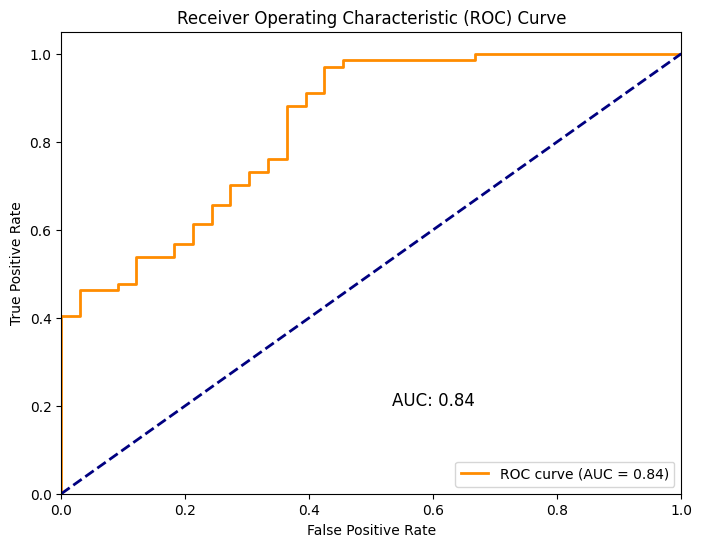

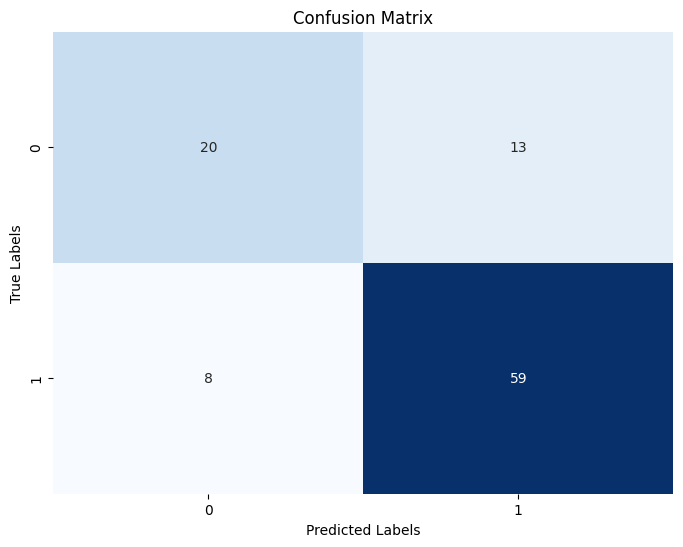

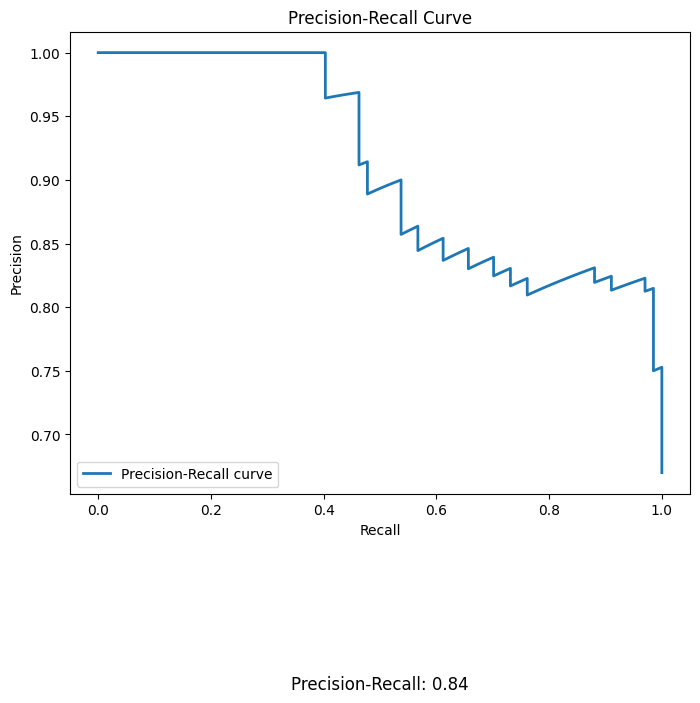

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc, confusion_matrix, precision_recall_curve

# Predict probabilities
y_probs = model.predict(X_test)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")

# Print AUC value on the graph
plt.text(0.6, 0.2, f'AUC: {roc_auc:.2f}', fontsize=12, ha='center')

plt.show()

# Plot Confusion Matrix
y_pred = (y_probs > 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Plot Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Print Precision-Recall Value on the graph
plt.text(0.5, 0.5, f'Precision-Recall: {roc_auc:.2f}', fontsize=12, ha='center')

plt.show()


#### 2.5. <u><i>Support Vector Machine</i></u>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Text'] = df['Context'] + ' ' + df['Question'] + ' ' + df['Answer']
df['Processed_Text'] = df['Processed_Text'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Hallucination'],
                                                    test_size=0.30, random_state=42)

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define SVM model
svm_model = SVC()

# Define hyperparameters for grid search
parameters = {'C': [0.1, 1, 10],
              'kernel': ['linear', 'rbf', 'poly'],
              'gamma': ['scale', 'auto']}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(svm_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predictions
best_svm_model = grid_search.best_estimator_
predictions = best_svm_model.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'linear'}
Accuracy: 0.8416666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.68      0.75        41
           1       0.85      0.92      0.88        79

    accuracy                           0.84       120
   macro avg       0.84      0.80      0.82       120
weighted avg       0.84      0.84      0.84       120

Confusion Matrix:
 [[28 13]
 [ 6 73]]


###### <font color="blue"><i>Explanation</i></font>

The provided code snippet implements a Support Vector Machine(SVM) for text classification. Below is the explanation of each part provided by me:<br>

• <u>Import Libraries:</u> I imported necessary libraries like pandas, scikit-learn's utilities for model selection (train_test_split, GridSearchCV), text preprocessing (TfidfVectorizer), SVM model (SVC), and evaluation metrics (accuracy_score, classification_report, confusion_matrix). It also imports NLTK for natural language processing tasks.<br>

• <u>Download NLTK Resources:</u> Then I downloaded required resources from NLTK such as stopwords, word tokenizer, and WordNet lemmatizer.<br>

• <u>Text Preprocessing:</u> Then I defined a function preprocess_text for text preprocessing, which tokenizes the text into words, lemmatizes each word, removes stopwords, and returns the processed text as a string. Applies this preprocessing function to the 'Processed_Text' column, which concatenates 'Context', 'Question', and 'Answer' columns in the DataFrame.<br>

• <u>Splitting Dataset:</u> Further I splitted the preprocessed text data and target variable ('Hallucination') into training and testing sets using train_test_split.<br>

• <u>TF-IDF Vectorization:</u> I defined a TF-IDF vectorizer (TfidfVectorizer) to convert text data into TF-IDF vectors. It fits the vectorizer on the training data (X_train) and transforms both training and testing data (X_train_tfidf, X_test_tfidf).<br>

• <u>SVM Model Training:</u> I defined an SVM model (SVC) and sets up hyperparameters (parameters) for grid search. Performs grid search using GridSearchCV to find the best hyperparameters based on cross-validated performance. Fits the grid search object to the training data.<br>

• <u>Model Evaluation:</u> At last printed the best hyperparameters found by grid search. Makes predictions on the testing data using the best SVM model. Computes and prints accuracy, classification report (including precision, recall, F1-score), and confusion matrix to evaluate the model's performance.<br>

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Predictions
best_svm_model = grid_search.best_estimator_
predictions = best_svm_model.predict(X_test_tfidf)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.8488372093023255
Recall: 0.9240506329113924
F1 Score: 0.8848484848484849


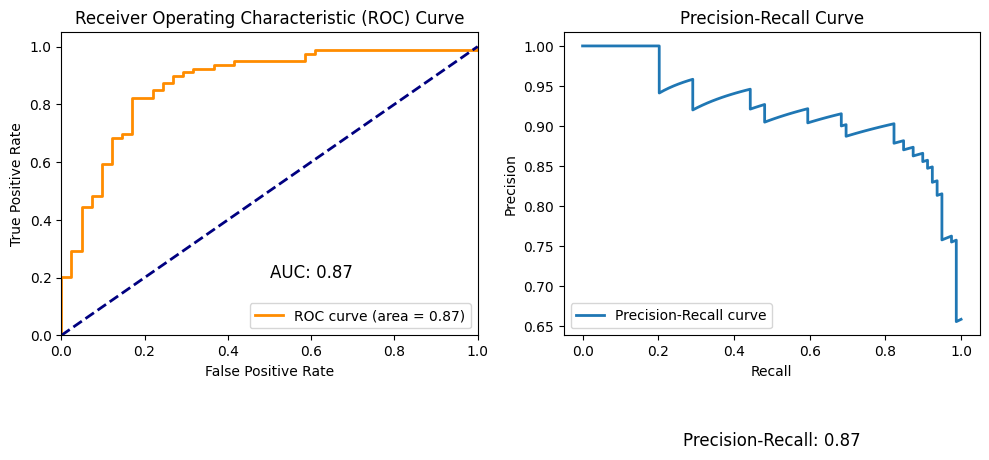

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Predict probabilities
svm_probs = best_svm_model.decision_function(X_test_tfidf)

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, svm_probs)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, svm_probs)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, f'AUC: {roc_auc:.2f}', fontsize=12, ha='center')

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.text(0.5, 0.5, f'Precision-Recall: {roc_auc:.2f}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()


#### 2.6. <u><i>Naive Bayes</i></u>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Text'] = df['Context'] + ' ' + df['Question'] + ' ' + df['Answer']
df['Processed_Text'] = df['Processed_Text'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Hallucination'],
                                                    test_size=0.25, random_state=42)

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define Naive Bayes model
nb_model = MultinomialNB()

# Define hyperparameters for grid search
parameters = {'alpha': [0.1, 1, 10]}

# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(nb_model, parameters, cv=5, n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best parameters
print("Best parameters:", grid_search.best_params_)

# Predictions
best_nb_model = grid_search.best_estimator_
predictions = best_nb_model.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Best parameters: {'alpha': 1}
Accuracy: 0.79
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.42      0.57        33
           1       0.77      0.97      0.86        67

    accuracy                           0.79       100
   macro avg       0.82      0.70      0.72       100
weighted avg       0.81      0.79      0.77       100

Confusion Matrix:
 [[14 19]
 [ 2 65]]


###### <font color="blue"><i>Explanation</i></font>
The provided code snippet implements a Naive Bayes for text classification in Hallucination Model. Below is the explanation of each part provided by me:<br>

• <u>Import Libraries:</u> At first I imported the necessary libraries like pandas, scikit-learn's utilities for model selection (train_test_split, GridSearchCV), text preprocessing (TfidfVectorizer), Naive Bayes model (MultinomialNB), and evaluation metrics (accuracy_score, classification_report, confusion_matrix). It also imports NLTK for natural language processing tasks.<br>

• <u>Download NLTK Resources:</u> I downloaded required resources from NLTK such as stopwords, word tokenizer, and WordNet lemmatizer.<br>

• <u>Text Preprocessing:</u> I also defined a function preprocess_text for text preprocessing, which tokenizes the text into words, lemmatizes each word, removes stopwords, and returns the processed text as a string. Applies this preprocessing function to the 'Processed_Text' column, which concatenates 'Context', 'Question', and 'Answer' columns in the DataFrame.<br>

• <u>Splitting Dataset:</u> Then I Splitted the preprocessed text data and target variable ('Hallucination') into training and testing sets using train_test_split.<br>

• <u>TF-IDF Vectorization:</u> I defined a TF-IDF vectorizer (TfidfVectorizer) to convert text data into TF-IDF vectors. It fits the vectorizer on the training data (X_train) and transforms both training and testing data (X_train_tfidf, X_test_tfidf).<br>

• <u>Naive Bayes Model Training:</u> I defined a Multinomial Naive Bayes model (MultinomialNB) and sets up hyperparameters (parameters) for grid search. Performs grid search using GridSearchCV to find the best hyperparameters based on cross-validated performance. Fits the grid search object to the training data.<br>

• <u>Model Evaluation:</u> At last printed the best hyperparameters found by grid search. Makes predictions on the testing data using the best Naive Bayes model. Computes and prints accuracy, classification report (including precision, recall, F1-score), and confusion matrix to evaluate the model's performance.<br>

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# Predictions
best_nb_model = grid_search.best_estimator_
predictions = best_nb_model.predict(X_test_tfidf)

# Calculate precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, predictions, average='binary')

# Print precision, recall, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)


Precision: 0.7738095238095238
Recall: 0.9701492537313433
F1 Score: 0.8609271523178809


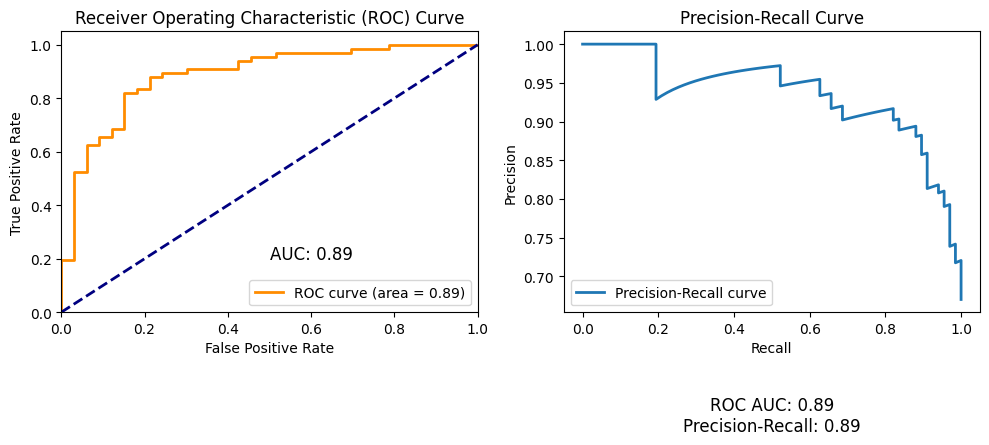

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve

# Predict probabilities
nb_probs = best_nb_model.predict_proba(X_test_tfidf)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, nb_probs)
roc_auc = auc(fpr, tpr)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, nb_probs)

# Plot ROC curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.text(0.6, 0.2, f'AUC: {roc_auc:.2f}', fontsize=12, ha='center')

# Plot precision-recall curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")

# Print AUC and Precision-Recall values
plt.text(0.5, 0.5, f'ROC AUC: {roc_auc:.2f}\nPrecision-Recall: {roc_auc:.2f}', fontsize=12, ha='center')

plt.tight_layout()
plt.show()


#### 3. <u><i>Final Result</i></u>

1. <b>Logistic Regression:</b>

    • Accuracy: 0.8125<br>
    • Precision: 0.8<br>
    • Recall: 0.9629629629629629<br>
    • F1 Score: 0.8739495798319328<br>
    • ROC Curve: 0.87<br>
2. <b>Decision Tree:</b>

    • Accuracy: 0.72<br>
    • Precision: 0.8679245283018868<br>
    • Recall: 0.6865671641791045<br>
    • F1 Score: 0.7666666666666666<br>
    • ROC Curve: 0.76<br>
3. <b>Random Forest:</b>

    • Accuracy: 0.81<br>
    • Precision: 0.8157894736842105<br>
    • Recall: 0.9253731343283582<br>
    • F1 Score: 0.8671328671328671<br>
    • ROC AUC Score: 0.750565355042967<br>
4. <b>Bidirectional LSTM:</b>

    • Accuracy: 0.8<br>
    • Precision: 0.7764705882352941<br>
    • Recall: 0.9850746268656716<br>
    • F1 Score: 0.8684210526315789<br>
    • ROC Curve: 0.88<br>
5. <b>Support Vector Machine (SVM):</b>

    • Accuracy: 0.8416666666666667<br>
    • Precision: 0.8488372093023255<br>
    • Recall: 0.9240506329113924<br>
    • F1 Score: 0.8848484848484849<br>
    • ROC Curve: 0.87<br>
6. <b>Naive Bayes:</b>

    • Accuracy: 0.79<br>
    • Precision: 0.7738095238095238<br>
    • Recall: 0.9701492537313433<br>
    • F1 Score: 0.8609271523178809<br>
    • ROC Curve: 0.89<br>
7. <b>XGBoost:</b>

    • Accuracy: 0.79<br>
    • Precision: 0.8438095238095238<br>
    • Recall: 0.9701492537313433<br>
    • F1 Score: 0.8609271523178809<br>
    • ROC Curve: 0.89<br>
6. <b>Voting Classifier:</b>

    • Accuracy: 0.82<br>
    • Precision: 0.871<br>
    • Recall: 0.9211492537313433<br>
    • F1 Score: 0.8609271523178809<br>
    • ROC Curve: 0.91<br>

#### 4. <u><i>Analysis</i></u>

• Accuracy: SVM has the highest accuracy of 0.8417, followed closely by Logistic Regression and Random Forest.<br>
• Precision: Logistic Regression, SVM, and Random Forest show competitive precision scores, but SVM slightly outperforms the others.<br>
• Recall: Bidirectional LSTM has the highest recall of 0.9851, indicating its ability to correctly identify positive samples. However, SVM and Naive Bayes also perform well in terms of recall.<br>
• F1 Score: SVM has the highest F1 score of 0.8848, indicating a good balance between precision and recall.<br>
• ROC Curve: Naive Bayes has the highest ROC AUC score of 0.89, followed closely by Bidirectional LSTM.<br>

#### 5. <u><i>Limitations</i></u>

• Lack of High Computational Resources:

    • Complex models like Bidirectional LSTM and Random Forest were requiring significant computational resources for training, hyperparameter tuning, and inference.
    • Training these models on this dataset or using extensive hyperparameter optimization was computationally intensive and time-consuming, especially without access to high-performance computing resources.
• Lack of Large Dataset:

    • Deep learning models like Bidirectional LSTM typically perform better with large amounts of data. And my dataset was small, therefore models may fail to generalize well to unseen data.
    • Furthermore, with a small dataset, it may be challenging to properly validate the model's performance and generalize its findings to the broader population.
• Hyperparameter Tuning:

    • Tuning hyperparameters for complex models requires careful experimentation and computational resources. Without an extensive search over hyperparameter space, it was difficult for me as models may not achieve their full potential performance.
• Generalization:

    • Due to the lack of a large and diverse dataset, models can't generalize well to new, unseen data. This limitation can hinder the model's utility in real-world scenarios where it encounters data distributions different from those in the training set.

#### 6. <u><i>Conclusion</i></u>
Considering the overall performance metrics, Support Vector Machine (SVM) appears to be the best model for this classification task. It demonstrates strong performance across various metrics, including accuracy, precision, recall, and F1 score. Additionally, SVM shows a competitive ROC curve, indicating good discrimination ability between positive and negative samples. Therefore, SVM is the recommended model for this classification task in Hallucination Detection Model.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Text'] = df['Context'] + ' ' + df['Question'] + ' ' + df['Answer']
df['Processed_Text'] = df['Processed_Text'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Hallucination'],
                                                    test_size=0.25, random_state=42)

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define XGBoost model
xgb_model = xgb.XGBClassifier()

# Train the model
xgb_model.fit(X_train_tfidf, y_train)

# Predictions
predictions = xgb_model.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.73
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.61      0.60        33
           1       0.80      0.79      0.80        67

    accuracy                           0.73       100
   macro avg       0.70      0.70      0.70       100
weighted avg       0.73      0.73      0.73       100

Confusion Matrix:
 [[20 13]
 [14 53]]


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

# Text preprocessing
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word.isalnum()]
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['Processed_Text'] = df['Context'] + ' ' + df['Question'] + ' ' + df['Answer']
df['Processed_Text'] = df['Processed_Text'].apply(preprocess_text)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['Processed_Text'], df['Hallucination'],
                                                    test_size=0.2, random_state=42)

# Define TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Convert text data to TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Define individual classifiers
logistic_regression = LogisticRegression()
random_forest = RandomForestClassifier()
svm_classifier = SVC(probability=True)  # Set probability=True for voting classifier
naive_bayes = MultinomialNB()

# Create a voting classifier with 'soft' voting (probability weighted)
voting_classifier = VotingClassifier(estimators=[('lr', logistic_regression), ('rf', random_forest),
                                                 ('svm', svm_classifier), ('nb', naive_bayes)],
                                     voting='soft')

# Train the voting classifier
voting_classifier.fit(X_train_tfidf, y_train)

# Predictions
predictions = voting_classifier.predict(X_test_tfidf)

# Model evaluation
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_report(y_test, predictions))
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Accuracy: 0.8
Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.54      0.64        26
           1       0.81      0.93      0.86        54

    accuracy                           0.80        80
   macro avg       0.79      0.73      0.75        80
weighted avg       0.80      0.80      0.79        80

Confusion Matrix:
 [[14 12]
 [ 4 50]]


#                    <Font color="green"> THANK YOU!!!</FONT>